## Introduction

This is an analysis of data from the National Parks Service about endangered species in different parks.

This goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations. In our hypothetical scenario, we're a biodiversity analyst working for the National Park Service, and the National Park Service wants to ensure the survival of species at risk, to maintain the parks' biodiversity.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

Here's a few questions that we want to answer with this project:

    What is the distribution of conservation status for species?
    Are certain types of species more likely to be endangered?
    Are the differences between species and their conservation status significant?
    Which animal is most prevalent and what is their distribution amongst parks?

Data sources:

`observations.csv` and `species_info.csv` were sourced from https://content.codecademy.com/PRO/paths/data-science/biodiversity-solution.zip

Note: While inspired by real data, the data here is mostly fictional.



## Scoping

Here we decide the scope of this project. We do this through 4 different categories - Project Goals, Data, Analysis and Evaluation

### Project Goals

In our hypothetical scenario, we're a biodiversity analyst working for the National Park Service, and the National Park Service wants to ensure the survival of species at risk, to maintain the parks' biodiversity.

As described in the introduction, we have a few questions that we want to answer:

    What is the distribution of conservation status for species?
    Are certain types of species more likely to be endangered?
    Are the differences between species and their conservation status significant?
    Which animal is most prevalent and what is their distribution amongst parks?

### Data

We have access to two csv files. `observations.csv` relates to the observations of species in park locations, and `species_info.csv` relates to information about different species. We'll get into more detail about these once the project is started.

### Analysis

We'll be using a number of different analysis tools, namely we want to use descriptive statistics, data visualisation and statistical inference to achieve our project goals. We'll be computing distributions, counts, relationship between species, conservation status of species and observations of species in parks.

### Evaluation

Lastly, once we've analysed our data, we want to evaluate our findings, ask if we've answered the questions set out in the project goals, as well as any problems or shortcomings of the data we had available or the methods we've used.

## Import modules

Here we import any important modules for the project.

`numpy` is for numerical manipulation,
`pandas` is for data manipulation,
`pyplot` and `seaborn` are for plotting data.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Loading the Data

Let's read our data and see what we have:

### species_info.csv

In [2]:
df_species = pd.read_csv('species_info.csv')
df_species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


`species_info.csv` has info about different species, with columns:
1. `category` - category of species (eg. mammal, bird, reptile, vascular plant)
1. `scientific_name` - scientific name of the species
1. `common_name` - any other names that the animal may be reffered to as, sometimes seperated by commas but also by 'Or'
1. `conservation_status` - their conservation status (whether endangered or not, see https://en.wikipedia.org/wiki/Endangered_species for more info).

### observations.csv

In [3]:
df_obs = pd.read_csv('observations.csv')
df_obs.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


'observations.csv', has a list of different species paired with the national park they were spotted at. This is then paired with the number of observations of this species at this park. According to the description, this is observations over the past 7 days. It has columns:

1. scientific_name - scientific name of the species, as seen on 'species_info.csv'
1. park_name - which park this species has been spotted at
1. observations - how many observations of this animal in the past 7 days

### Dimensions

Next we check how many rows and columns each data set has.

In [4]:
print(f"The species dataframe has shape {df_species.shape}")
print(f"The observations dataframe has shape {df_obs.shape}")

The species dataframe has shape (5824, 4)
The observations dataframe has shape (23296, 3)


So we see that the species dataframe has 5824 rows and 4 columns, and the observations dataframe has 23296 rows and 3 columns.

## Exploring the Data

We'd like to know a little more about our data sets, starting with the species dataframe. How many unique species do we have?

In [5]:
print(f"Unique number of species in the species dataframe:{df_species.scientific_name.nunique()}")

Unique number of species in the species dataframe:5541


Next, we want to know how many and what categories we have for the `category` column. Let's check:

In [6]:
print(f"How many categories of species: {df_species.category.nunique()}")
print(f"\nWhat categories of species: {df_species.category.unique()}")
print("\nHow many of each category do we have?")
df_species.groupby("category").size()

How many categories of species: 7

What categories of species: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']

How many of each category do we have?


category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

We can see based on this that *most* of the species are actually vascular plants, with 4470. We also have a lot of birds and nonvascular plants, but not many reptiles - only 79.

We should also have a look at the `conservation_status` column: what does it look like?

In [7]:
print(f"Unique number of conservation status: {df_species.conservation_status.nunique()}")
print(f"What conservation statuses: {df_species.conservation_status.unique()}")

Unique number of conservation status: 4
What conservation statuses: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


We see that we have some `NaN` in our `conservation_status` column - these actually mean that the species is not endangered. We'll deal with this later in our analysis section. For now, we'll see how much of each conservation status we have:

In [8]:
print(df_species.groupby("conservation_status").size())
print(f"Number of NaN values: {df_species.conservation_status.isna().sum()}")

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64
Number of NaN values: 5633


We see that *most* of our species are not endangered - there are 5633 `NaN` values. However, 161 of our species are of concern, 10 are threatened, 16 are endangered and 4 are in recovery.

### observations.csv

Next we turn our attention to the observations dataframe. We're interested in the parks in the data set, referred to in the `park_name` column. How many and what parks are there?

In [9]:
print(f"How many parks: {df_obs.park_name.nunique()}")
print(f"Names of parks: {df_obs.park_name.unique()}")

How many parks: 4
Names of parks: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


We see there's four parks in the data set - Great Smoky Mountains, Yosemite, Bryce and Yellowstone.

It'd also be great to know how many total observations there were:

In [10]:
print(f"Total observations: {df_obs.observations.sum()}")

Total observations: 3314739


We see there's over 3.3 million total observations over the 7 day timeframe. This is a lot of data points.

## Analysis

The first objective I have is, as mentioned in the exploration section, to replace the `NaN` in the `conservation_status` column of the species dataframe, as this refers to animals that aren't of concern in terms of endangerment. So we'll replace `NaN` with `Not of Concern`.

In [11]:
df_species.fillna('Not of Concern', inplace=True)
print(df_species.groupby("conservation_status").size())

conservation_status
Endangered              16
In Recovery              4
Not of Concern        5633
Species of Concern     161
Threatened              10
dtype: int64


### Distribution of conservation status

Next, we'll have a look at the makeup of each `conservation_status` relating to each `category` of species. How many mammals, birds, reptiles, etc. are endangered? This will help to resolve our question "What is the distribution of conservation status for species?"

In [12]:
conservation_with_category = df_species.groupby(['conservation_status','category']).scientific_name.count().unstack()
conservation_with_category.columns

Index(['Amphibian', 'Bird', 'Fish', 'Mammal', 'Nonvascular Plant', 'Reptile',
       'Vascular Plant'],
      dtype='object', name='category')

We can see that no nonvascular plants or reptiles are above species of concern on the conservation status. 7 mammals, 4 birds, 3 fish, 1 amphibian and 1 vascular plant are endangered. Let's plot to see more. Not of Concern is much larger than the other categories so we'll plot this seperately.

<Axes: xlabel='conservation_status'>

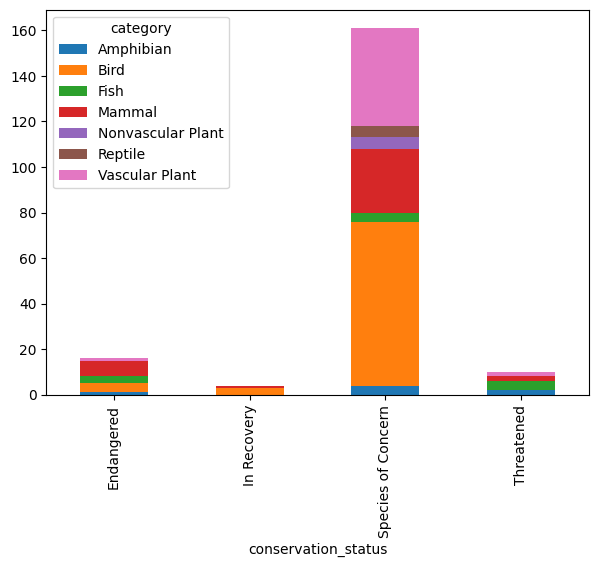

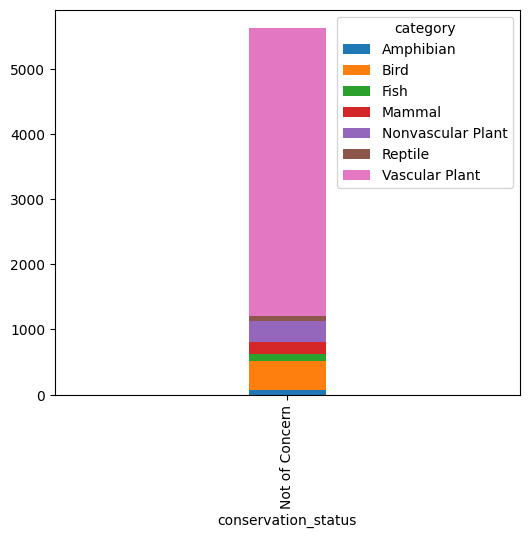

In [13]:
conservation_with_category.drop(index=['Not of Concern']).plot(stacked=True,kind='bar',figsize=(7,5))
conservation_with_category.drop(index=['Endangered','In Recovery','Species of Concern','Threatened']).plot(stacked=True,kind='bar',figsize=(6,5), width=.1)

This answers our question "What is the distribution of conservation status for species?".

### Likelihood of Conservation Status

Next we ask the question: "Are certain types of species more likely to be endangered?". We do this by finding the proportion of each category that have some kind of conservation status.

In [14]:
df_species['is_protected'] = df_species.conservation_status.ne('Not of Concern')
protected_category = df_species.groupby(['category','is_protected']).scientific_name.nunique().unstack().reset_index()
protected_category.columns = ['category', 'unprotected','protected']
protected_category['protected_percent'] = 100*(protected_category.protected / (protected_category.protected + protected_category.unprotected))

protected_category

,category,unprotected,protected,protected_percent
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


From this, we see that some animals are more likely to be endangered than others - around `15%` of birds and `17%` of mammals are endangered in some capacity, whereas only `1%` of vascular plants and `1.5%` of nonvascular plants are endangered.

### Statistical Significance of Species and Conservation Status

In this section we seek to answer: "Are the differences between species and their conservation status significant?". To do this, we'll perform a chi-squared test.

In our contigency tests, we'll build a contigency table based on two categories of species and their protection status.

Firstly, for mammals vs birds: is there a statistically significant difference between number of protected mammals vs number of protected birds?

||protected|not protected|
|-|-|-|
|Mammal|30|146|
|Bird|75|413|

In [15]:
from scipy.stats import chi2_contingency

contingency1 = [[30, 146],
              [75, 413]]
chi2_contingency(contingency1)

Chi2ContingencyResult(statistic=0.1617014831654557, pvalue=0.6875948096661336, dof=1, expected_freq=array([[ 27.8313253, 148.1686747],
       [ 77.1686747, 410.8313253]]))

The important value we're looking for here is the p-value. If the p-value is under a certain number (usually `0.05`), we say that the differences are statistically significant. 

We see that the p-value between mammals and birds is `0.688`, which is much higher than `0.05`, so the difference is not statistically significant. We expected this, really, as the percentages of protected birds/mammals are similar, at `15%` and `17%` protected species respectively.

Let's check something with a bigger difference, to see whether the difference is significant, for example between mammals and vascular plants.

||protected|not protected|
|-|-|-|
|Mammal|30|146|
|Vascular Plant|46|4216|

With the major differences in percentages (`1%` vs `17%`), and the high number of species of vascular plants giving a more accurate reading, we expect this to be statistically significant.

In [16]:
contingency2 = [[30, 146],
              [46, 4216]]
chi2_contingency(contingency2)

Chi2ContingencyResult(statistic=246.5870424874456, pvalue=1.4405067309854046e-55, dof=1, expected_freq=array([[3.01397026e+00, 1.72986030e+02],
       [7.29860297e+01, 4.18901397e+03]]))

The p-value for this is `1.44e-55`, or `1.44 * 10^-55 = 0.000000....0000144 <<< 0.05` is very much statistically significant - it is much smaller than `0.05`. So the difference in proportions of protected mammals and vascular plants *is* statistically significant, i.e. we have reason to believe that the difference in numbers is down to external factors rather than just statistical variance.

### Distribution among parks

Finally we answer the question "Which animal is most prevalent and what is their distribution amongst parks?", using our second data set.

Firstly, we find out which species have the most observations over all parks.

In [78]:
popular_observations = df_obs.groupby(['scientific_name']).observations.sum().nlargest(10)

popular_observations

scientific_name
Streptopelia decaocto    1785
Holcus lanatus           1780
Castor canadensis        1725
Hypochaeris radicata     1720
Puma concolor            1711
Procyon lotor            1692
Columba livia            1653
Myotis lucifugus         1547
Bidens tripartita        1296
Oxalis dillenii          1276
Name: observations, dtype: int64

Now we know which species are the most popular, what are they? We'll need to consult our other data set.

In [79]:
popular_observations = popular_observations.to_frame().merge(df_species, left_on='scientific_name', right_on='scientific_name')
popular_observations

,scientific_name,observations,category,common_names,conservation_status,is_protected
0,Streptopelia decaocto,1785,Bird,Eurasian Collared-Dove,Not of Concern,False
1,Streptopelia decaocto,1785,Bird,"Eurasian Collared Dove, Eurasian Collared-Dove",Not of Concern,False
2,Streptopelia decaocto,1785,Bird,Eurasian Collared Dove,Not of Concern,False
3,Holcus lanatus,1780,Vascular Plant,"Common Velvet Grass, Velvetgrass",Not of Concern,False
4,Holcus lanatus,1780,Vascular Plant,"Common Velvetgrass, Yorkshire-Fog",Not of Concern,False
5,Holcus lanatus,1780,Vascular Plant,"Common Velvetgrass, Velvetgrass, Yorkshire Fog",Not of Concern,False
6,Castor canadensis,1725,Mammal,"American Beaver, Beaver",Not of Concern,False
7,Castor canadensis,1725,Mammal,American Beaver,Not of Concern,False
8,Castor canadensis,1725,Mammal,Beaver,Not of Concern,False
9,Hypochaeris radicata,1720,Vascular Plant,"Cat's Ear, Spotted Cat's-Ear",Not of Concern,False


We've obviously got some duplicates, so we'll need to remove these.

In [80]:
longest = lambda x: max(x, key=lambda z:len(z))
popular_observations = popular_observations.groupby('scientific_name').aggregate({'observations': 'first',
                                                                                   	#'observations_yellowstone': 'first',
                                                                                    #'observations_bryce': 'first',
                                                                                    #'observations_yosemite': 'first',
                                                                                    #'observations_great_smoky': 'first',
                                                                                    'category': 'first',
                                                                                    'common_names': longest,
                                                                                    'conservation_status': 'first',	
                                                                                    'is_protected': 'first'}).sort_values('observations', ascending=False)
popular_observations

,observations,category,common_names,conservation_status,is_protected
scientific_name,,,,,
Streptopelia decaocto,1785,Bird,"Eurasian Collared Dove, Eurasian Collared-Dove",Not of Concern,False
Holcus lanatus,1780,Vascular Plant,"Common Velvetgrass, Velvetgrass, Yorkshire Fog",Not of Concern,False
Castor canadensis,1725,Mammal,"American Beaver, Beaver",Not of Concern,False
Hypochaeris radicata,1720,Vascular Plant,"Common Cat's-Ear, False Dandelion, Frogbit, Go...",Not of Concern,False
Puma concolor,1711,Mammal,"Cougar, Mountain Lion, Puma",Not of Concern,False
Procyon lotor,1692,Mammal,"Common Raccoon, Northern Raccoon, Raccoon",Not of Concern,False
Columba livia,1653,Bird,"Common Pigeon, Rock Dove, Rock Pigeon",Not of Concern,False
Myotis lucifugus,1547,Mammal,"Little Brown Bat, Little Brown Myotis, Little ...",Species of Concern,True
Bidens tripartita,1296,Vascular Plant,"Threelobe Beggarticks, Three-Lobe Beggarticks",Not of Concern,False


So we see the most popular species in order are the Eurasian Collared Dove, Common Velvetgrass, American Beaver, Common Cat's-Ear, Cougar, Common Raccoon, Common Pigeon, Little Brown Bat, Threelobe Beggarticks, and Dillen's Oxalis. Of these, 4 are Mammals, 4 are Vascular Plants, and 2 are Birds. And just 1 has a conservation status - the Little Brown Bat.

Now we'll plot these. As a bonus, we'll add their common name as well as where they were spotted in each park.

,observations,observations_yellowstone,observations_bryce,observations_yosemite,observations_great_smoky
scientific_name,,,,,
Streptopelia decaocto,1785,771,457,256,301
Holcus lanatus,1780,805,463,216,296
Castor canadensis,1725,703,501,243,278
Hypochaeris radicata,1720,726,505,195,294
Puma concolor,1711,753,408,239,311
Procyon lotor,1692,745,453,247,247
Columba livia,1653,722,423,169,339
Myotis lucifugus,1547,679,396,174,298
Bidens tripartita,1296,602,254,176,264


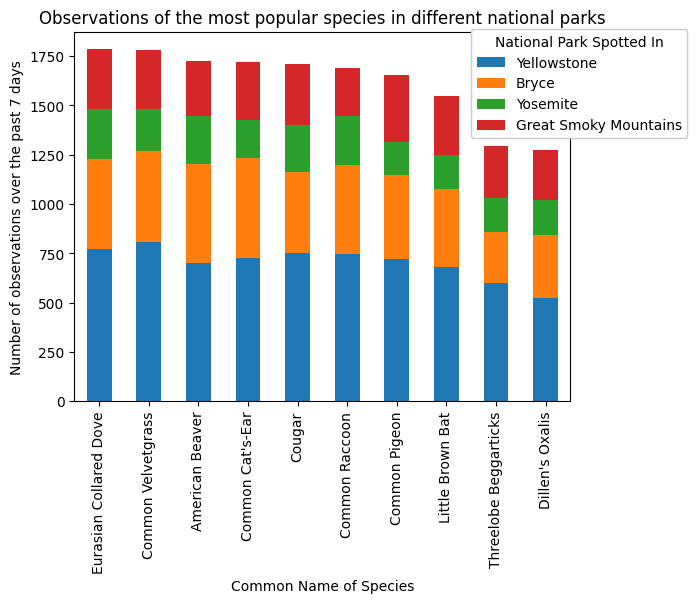

In [81]:
popular_observations.common_names = popular_observations.common_names.str.split(',').str[0] # tidy common name - take the first value of each common name
scientific_to_common = popular_observations['common_names'] # store common names for later

# one by one add the observations from each separate park for each species
popular_observations = popular_observations.merge(df_obs[df_obs.park_name == "Great Smoky Mountains National Park"][['scientific_name','observations']],\
                                                             left_on='scientific_name', right_on='scientific_name')\
                                                            .groupby('scientific_name').aggregate({'observations_x': 'first', 'observations_y': 'sum'})
popular_observations.columns = ['observations','observations_great_smoky']
popular_observations = popular_observations.merge(df_obs[df_obs.park_name == "Yosemite National Park"][['scientific_name','observations']],\
                                                             left_on='scientific_name', right_on='scientific_name')\
                                                            .groupby('scientific_name').aggregate({'observations_x': 'first', 'observations_y': 'sum','observations_great_smoky':'first'})
popular_observations.columns = ['observations','observations_yosemite','observations_great_smoky']
popular_observations = popular_observations.merge(df_obs[df_obs.park_name == "Bryce National Park"][['scientific_name','observations']],\
                                                             left_on='scientific_name', right_on='scientific_name')\
                                                            .groupby('scientific_name').aggregate({'observations_x': 'first', 'observations_y': 'sum','observations_great_smoky':'first', 'observations_yosemite':'first'})
popular_observations.columns = ['observations','observations_bryce','observations_yosemite','observations_great_smoky']
popular_observations = popular_observations.merge(df_obs[df_obs.park_name == "Yellowstone National Park"][['scientific_name','observations']],\
                                                             left_on='scientific_name', right_on='scientific_name')\
                                                            .groupby('scientific_name').aggregate({'observations_x': 'first', 'observations_y': 'sum','observations_great_smoky':'first', 'observations_yosemite':'first','observations_bryce':'first'})
popular_observations.columns = ['observations','observations_yellowstone','observations_bryce','observations_yosemite','observations_great_smoky']

popular_observations.sort_values('observations',inplace=True, ascending=False)

# plot bar chart
fig, ax = plt.subplots()
popular_observations[['observations_yellowstone','observations_bryce','observations_yosemite','observations_great_smoky']].plot(kind='bar',stacked=True,ax=ax)
ax.legend(['Yellowstone','Bryce','Yosemite','Great Smoky Mountains'],loc='upper right', bbox_to_anchor=(1.25, 1.025),framealpha=1,title='National Park Spotted In')
ax.set_xlabel('Common Name of Species')
ax.set_ylabel('Number of observations over the past 7 days')
ax.set_title('Observations of the most popular species in different national parks')
ax.set_xticklabels(scientific_to_common)
popular_observations

The most observed species was a Eurasian Collared Dove, which was spotted 1785 times over the past 7 days. They were spotted more at Yellowstone National Park, having been spotted 771 times, but were only observed 256 times at Yosemite National Park. Although we do see that most species were spotted more at Yellowstone, so there may be more factors at play here - this will be talked about in our conclusions.

## Conclusion

We've managed to answer our 4 questions:

- What is the distribution of conservation status for species?

We've seen that most species do not have a conservation status (5633 vs 191), but of those that do, most are a species of concern (161). 7 mammals, 4 birds, 3 fish, 1 amphibian and 1 vascular plant are endangered.

- Are certain types of species more likely to be endangered?

Mammals and Birds are more likely than others to be endangered - around `15%` of birds and `17%` of mammals are endangered in some capacity. Whereas, some are less likely to be endangered - only `1%` of vascular plants and `1.5%` of nonvascular plants are endangered. 

- Are the differences between species and their conservation status significant?

Mammals and Birds do not have a statistically significant difference, but Mammals and Birds do have a statistically significant difference to others such as Nonvascular Plants.

- Which animal is most prevalent and what is their distribution amongst parks?

The most observed species was a Eurasian Collared Dove, which was spotted 1785 times over the past 7 days. They were spotted most at Yellowstone National Park, having been spotted 771 times, but were only observed 256 times at Yosemite National Park.

### Further Research

We've seen that species seem to be spotted more at Yellowstone than at others. There is a variety of factors as to why that could be the case - more observers, more land area, or just generally more animals and plants. It'd be great to look into why that is the case.

There's also a limitation to using observations for species populations - some animals may be spotted more than others, eg. birds flying around could be counted by more than once more easily than plants, some animals may be scared of humans and so would avoid the observers, some species may be mistook for a similar looking species and so would skew the numbers.

Although using observations is a better tool for measuring population change - if we had access to observations over time, we could get a better idea if endangered species populations were increasing or dwindling.